In [4]:
import warnings
warnings.filterwarnings('ignore')

In [46]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels
import statsmodels.api as sm
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [6]:
advertising = pd.read_csv("advertising.csv")
advertising.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [7]:
advertising.info()## TO View the information of file attributes 


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
TV           200 non-null float64
Radio        200 non-null float64
Newspaper    200 non-null float64
Sales        200 non-null float64
dtypes: float64(4)
memory usage: 6.4 KB


Here the value 200 means each columns are contains 200 values 

In [8]:
## TO WATCH THE IMPORTANT STATITICS 
advertising.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


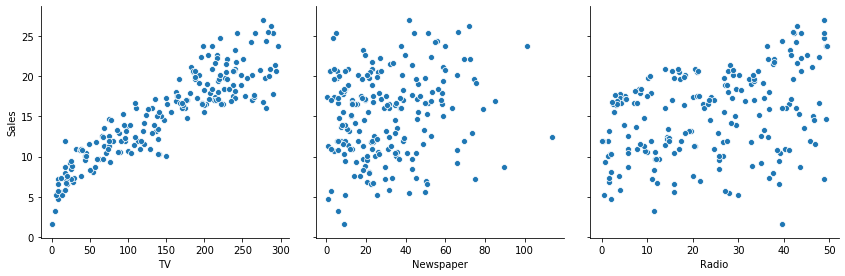

In [9]:
#Visualise the data
sns.pairplot(advertising, x_vars=['TV', 'Newspaper', 'Radio'], y_vars='Sales',size=4, aspect=1, kind='scatter')
plt.show()

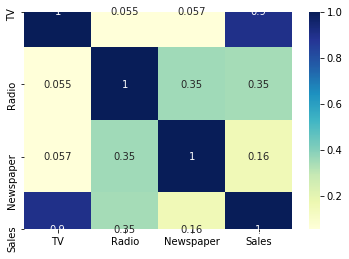

In [10]:
sns.heatmap(advertising.corr(), cmap="YlGnBu", annot = True)
plt.show()

In [11]:
advertising.corr() # n x n matrix odf corelation matrix

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.901208
Radio,0.054809,1.000000,0.354104,0.349631
Newspaper,0.056648,0.354104,1.000000,0.157960
Sales,0.901208,0.349631,0.157960,1.000000


## Step 1
    Create X and y

In [13]:
advertising.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [15]:
X = advertising['TV']
y = advertising['Sales']

## Step 2
    Create train and test sets

In [18]:
X_train, X_test , y_train, y_test = train_test_split(X, y, train_size = 0.70, random_state = 100)

In [19]:
X_train.shape ## To see the value of train x set

(140,)

## Step 3
    Train your model on the training set
    In Statsmodels the value of constant C ie.., intercept is not considered by default so in this we have to add the value of C explicitly in that model First.
    

In [20]:
X_train_sm = sm.add_constant(X_train)

In [21]:
X_train.head()

74     213.4
3      151.5
185    205.0
26     142.9
90     134.3
Name: TV, dtype: float64

In [22]:
X_train_sm.head()

,const,TV
74,1.0,213.4
3,1.0,151.5
185,1.0,205.0
26,1.0,142.9
90,1.0,134.3


## Fitting the model

In [24]:
lr = sm.OLS(y_train, X_train_sm)
lr_model = lr.fit()

In [25]:
lr_model.params

const    6.948683
TV       0.054546
dtype: float64

In [26]:
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.816
Model:                            OLS   Adj. R-squared:                  0.814
Method:                 Least Squares   F-statistic:                     611.2
Date:                Wed, 27 May 2020   Prob (F-statistic):           1.52e-52
Time:                        12:04:16   Log-Likelihood:                -321.12
No. Observations:                 140   AIC:                             646.2
Df Residuals:                     138   BIC:                             652.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.9487      0.385     18.068      0.000       6.188       7.709
TV             0.0545      0.002     24.722      0.000       0.050       0.059
==============================================================================
Omnibus:                        0.027   Durbin-Watson:                   2.196
Prob(Omnibus):                  0.987   Jarque-Bera (JB):                0.150
Skew:                          -0.006   Prob(JB):                        0.928
Kurtosis:                       2.840   Cond. No.                         328.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## But this summary cannot perform by the sklearn model this is advantage of statsmodels over sklearn model

In [29]:
#PLOTTING THE PREDICTION(Model building)

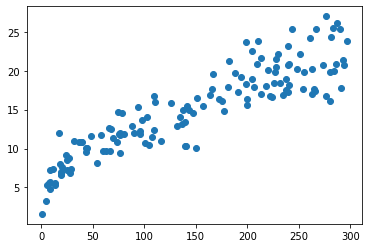

In [30]:
plt.scatter(X_train, y_train)

In [31]:
y_train_pred = lr_model.predict(X_train_sm)

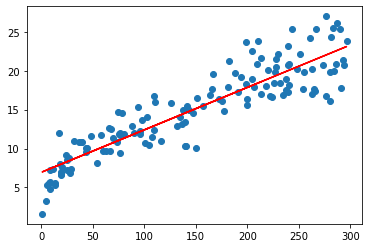

In [33]:
plt.scatter(X_train, y_train)
plt.plot(X_train, y_train_pred, 'r')
plt.show()

# RESIDUAL ANALYSIS

Text(0.5, 1.0, 'Residual Plot')

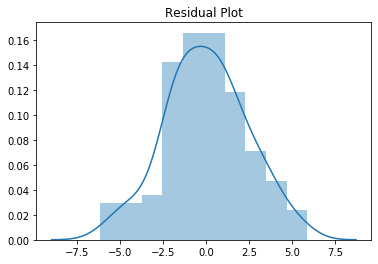

In [38]:
res = y_train - y_train_pred
plt.figure()
sns.distplot(res)
plt.title("Residual Plot")

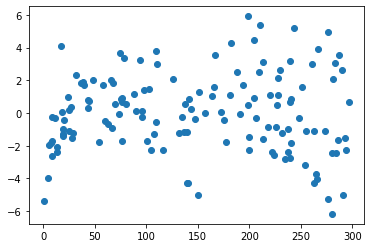

In [41]:
plt.scatter(X_train, res)
plt.show()

# Step 4
   Predictions and evaluation on the test Set

In [42]:
X_test_sm = sm.add_constant(X_test)

In [43]:
y_test_pred = lr_model.predict(X_test_sm)

In [44]:
## EVALUATION

In [50]:
r2 = r2_score(y_true = y_test , y_pred = y_test_pred)

In [51]:
print(r2)

0.7921031601245658


In [52]:
r2_score(y_true = y_train , y_pred = y_train_pred)

0.8157933136480389

In [53]:
mean_squared_error(y_true = y_test , y_pred = y_test_pred)

4.077556371826956

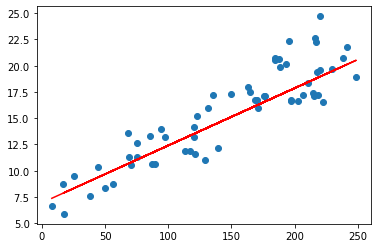

In [56]:
plt.scatter(X_test,y_test)
plt.plot(X_test, y_test_pred, 'r')
plt.show()